# <span style="color: steelblue;">Stress, Balance, and Remote Work: An Industry Analysis</span>

## About the Dataset: Remote Work and Employee Mental Health

As remote work becomes more common, it's important to understand how it affects employees' mental health. This dataset provides valuable information to examine this relationship across different industries and job types.

The dataset includes information on:
- Work arrangements (remote, in-office, or hybrid)
- Stress levels
- Work-life balance
- Mental health conditions
- Job roles and industries

By analyzing this data, we aim to identify patterns in how different work setups might influence mental well-being. We're also exploring whether some industries or job types face more mental health challenges than others.

This analysis could provide insights to help companies develop better strategies to support their employees' mental health, especially in remote or hybrid work environments. The findings from this dataset may contribute to our understanding of how to create healthier and more productive workplaces for everyone.

## Variables in the Dataset

### Demographics
- **Employee_ID**: Unique identifier for each employee
- **Age**: Age of the employee
- **Gender**: Gender of the employee
- **Region**: Geographic region where the employee works

### Job Information
- **Job_Role**: Current role of the employee
- **Industry**: Industry they work in
- **Years_of_Experience**: Total years of experience the employee has
- **Work_Location**: Whether they work remotely, hybrid, or onsite

### Work Patterns
- **Hours_Worked_Per_Week**: Average number of hours worked each week
- **Number_of_Virtual_Meetings**: Count of virtual meetings attended per week

### Well-being Indicators
- **Work_Life_Balance_Rating**: Self-reported rating on work-life balance (1-5)
- **Stress_Level**: Self-reported level of stress (Low, Medium, High)
- **Mental_Health_Condition**: Any reported mental health condition (e.g., Anxiety, Depression, None)
- **Social_Isolation_Rating**: Self-reported rating (1-5) on how isolated they feel
- **Physical_Activity**: Level of physical activity (None, Weekly, Daily)
- **Sleep_Quality**: Quality of sleep reported (Poor, Average, Good)

### Remote Work Factors
- **Satisfaction_with_Remote_Work**: Satisfaction level with remote work arrangements (Satisfied, Neutral, Unsatisfied)
- **Company_Support_for_Remote_Work**: Company support for remote work (1-5 scale)
- **Access_to_Mental_Health_Resources**: Availability of mental health resources (Yes/No)
- **Productivity_Change**: Change in productivity due to remote work (Increase, No Change, Decrease)

In [86]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Dataframe
df = pd.read_csv('./data/Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## Demographic Distribution Analysis

In this section, we'll analyze the demographic distribution of employees based on age, gender, and work locations.

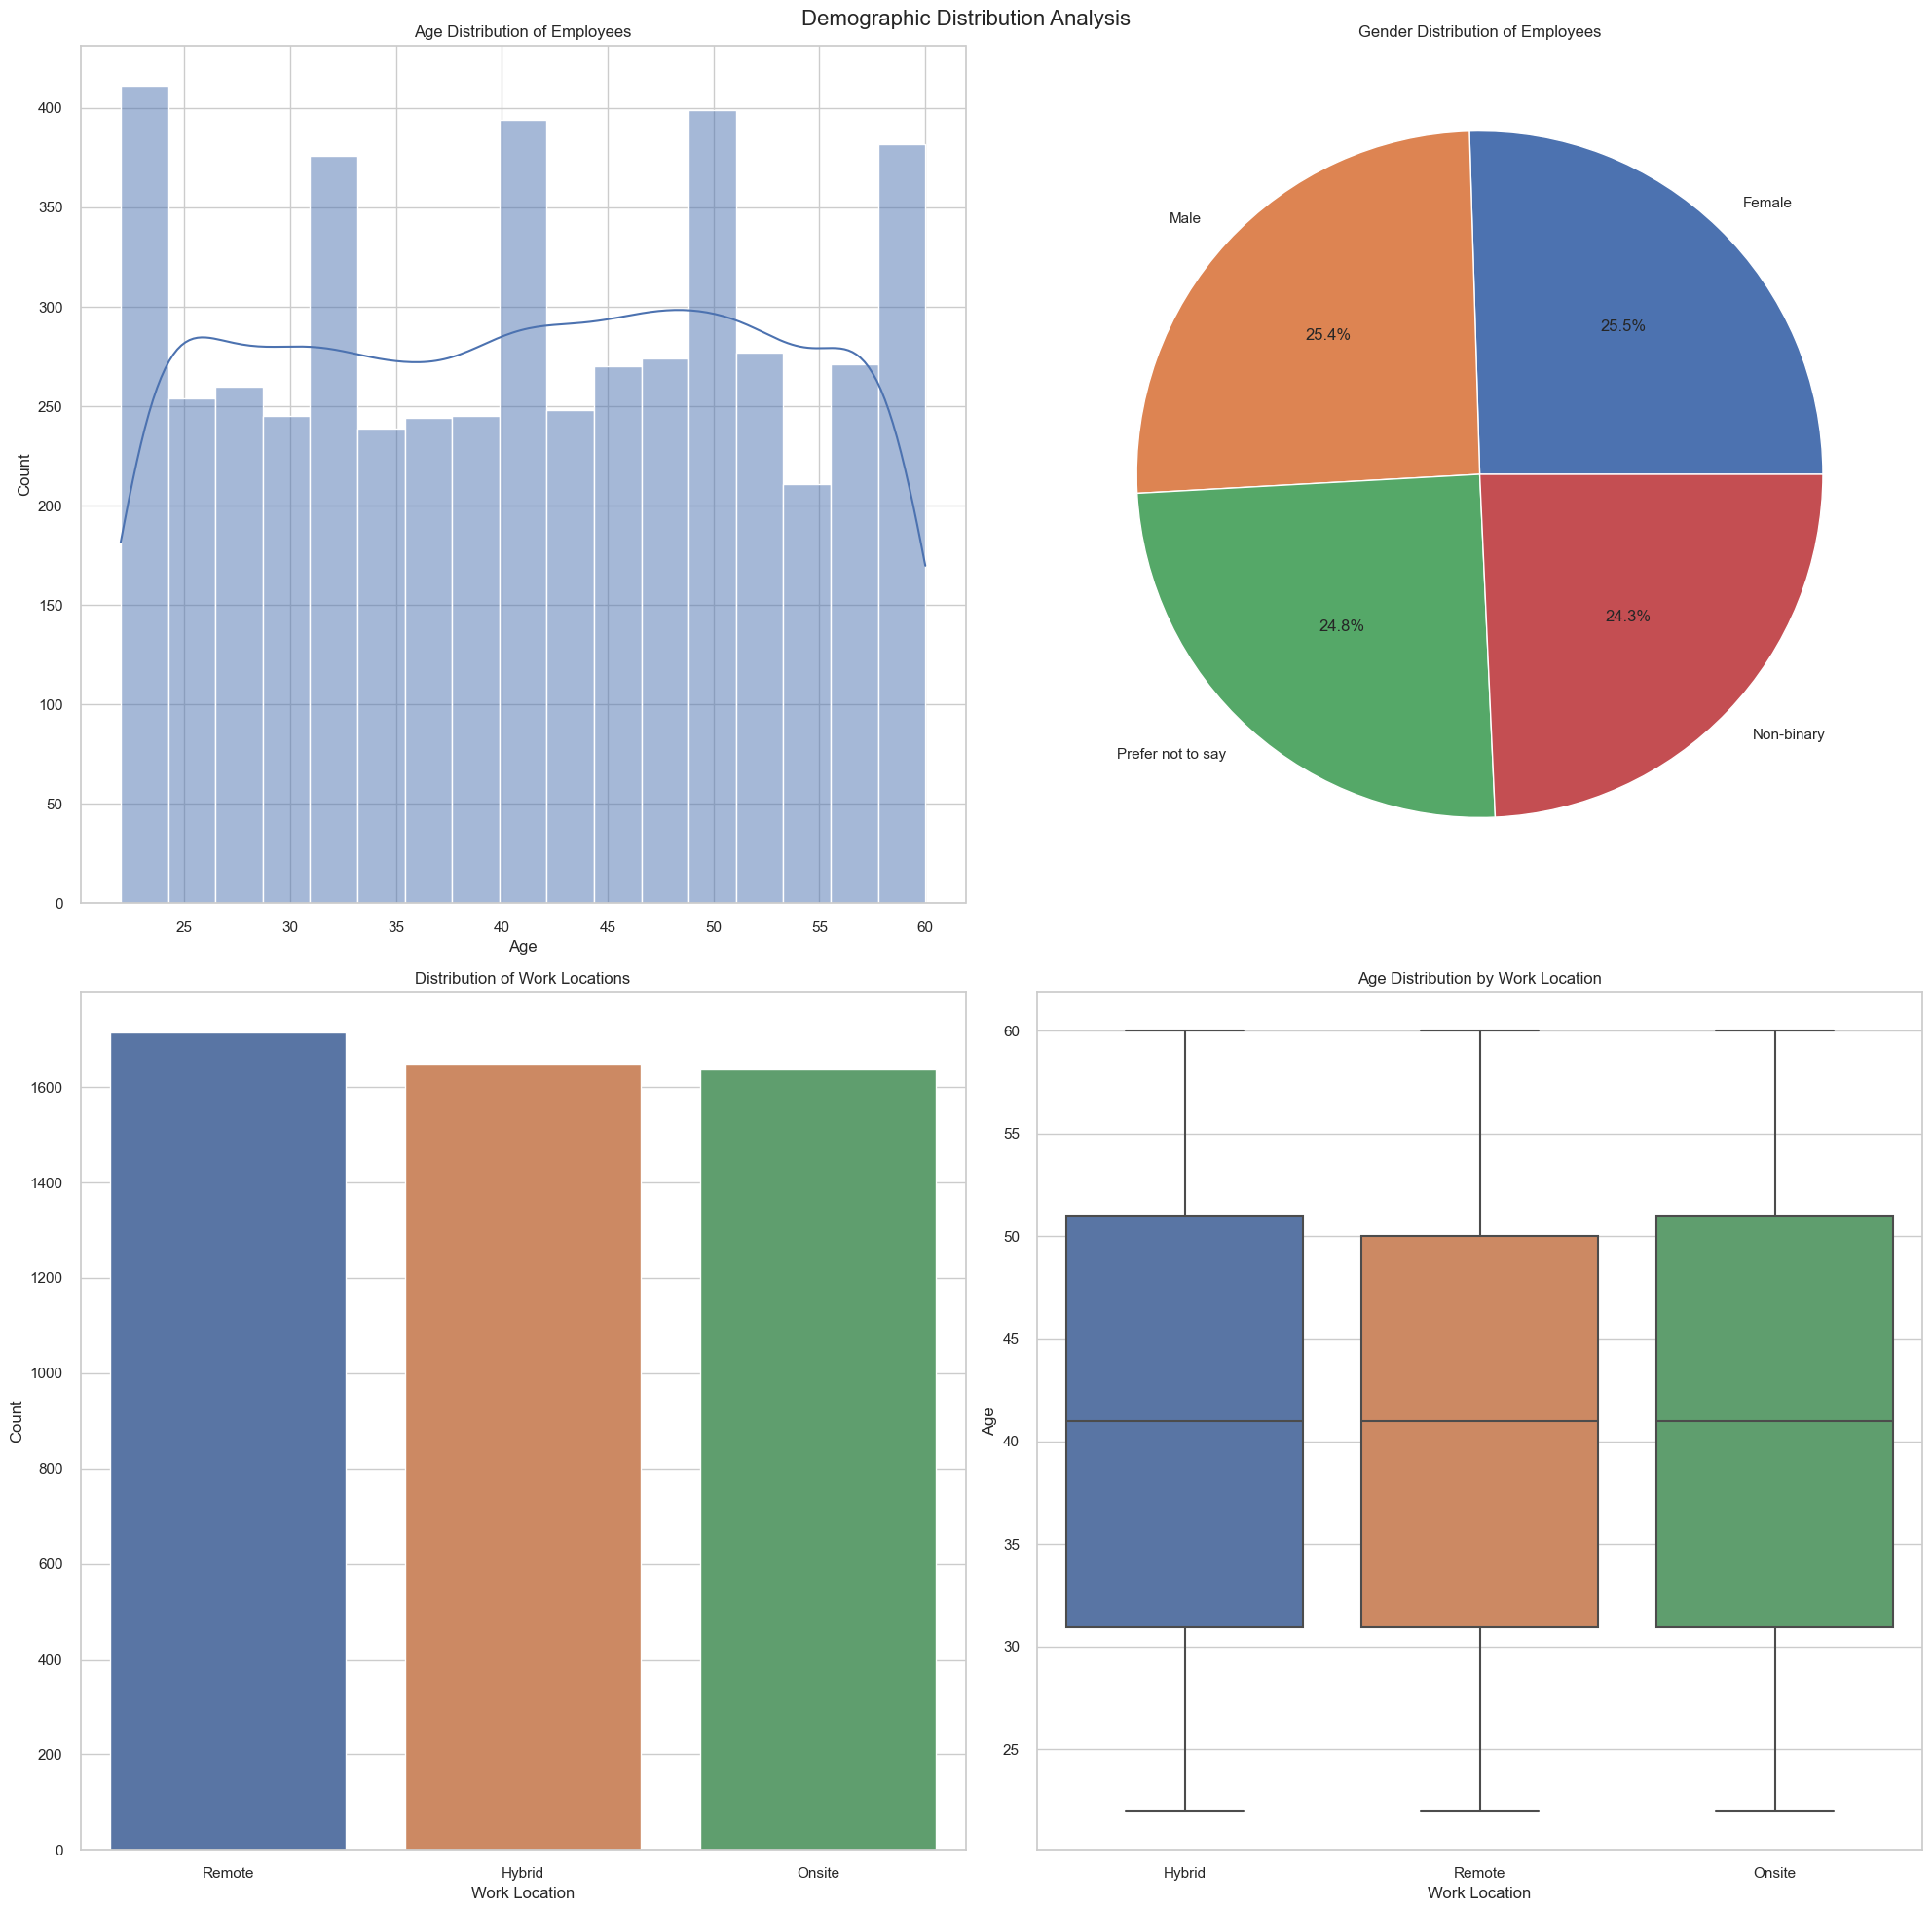

Age Statistics:
count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

Gender Distribution:
Female               0.2548
Male                 0.2540
Prefer not to say    0.2484
Non-binary           0.2428
Name: Gender, dtype: float64

Work Location Distribution:
Remote    0.3428
Hybrid    0.3298
Onsite    0.3274
Name: Work_Location, dtype: float64


In [88]:
# Set up the plotting style
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Demographic Distribution Analysis', fontsize=16)

# 1. Age distribution
sns.histplot(data=df, x='Age', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution of Employees')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')

# 2. Gender breakdown
gender_counts = df['Gender'].value_counts()
axs[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Gender Distribution of Employees')

# 3. Work Location distribution
location_counts = df['Work_Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Work Locations')
axs[1, 0].set_xlabel('Work Location')
axs[1, 0].set_ylabel('Count')

# 4. Age distribution by Work Location
sns.boxplot(data=df, x='Work_Location', y='Age', ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution by Work Location')
axs[1, 1].set_xlabel('Work Location')
axs[1, 1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Age Statistics:")
print(df['Age'].describe())

print("\nGender Distribution:")
print(df['Gender'].value_counts(normalize=True))

print("\nWork Location Distribution:")
print(df['Work_Location'].value_counts(normalize=True))

## Analysis of Stress Levels Across Industries
This section analyzes the distribution of stress levels across different industries in our dataset.

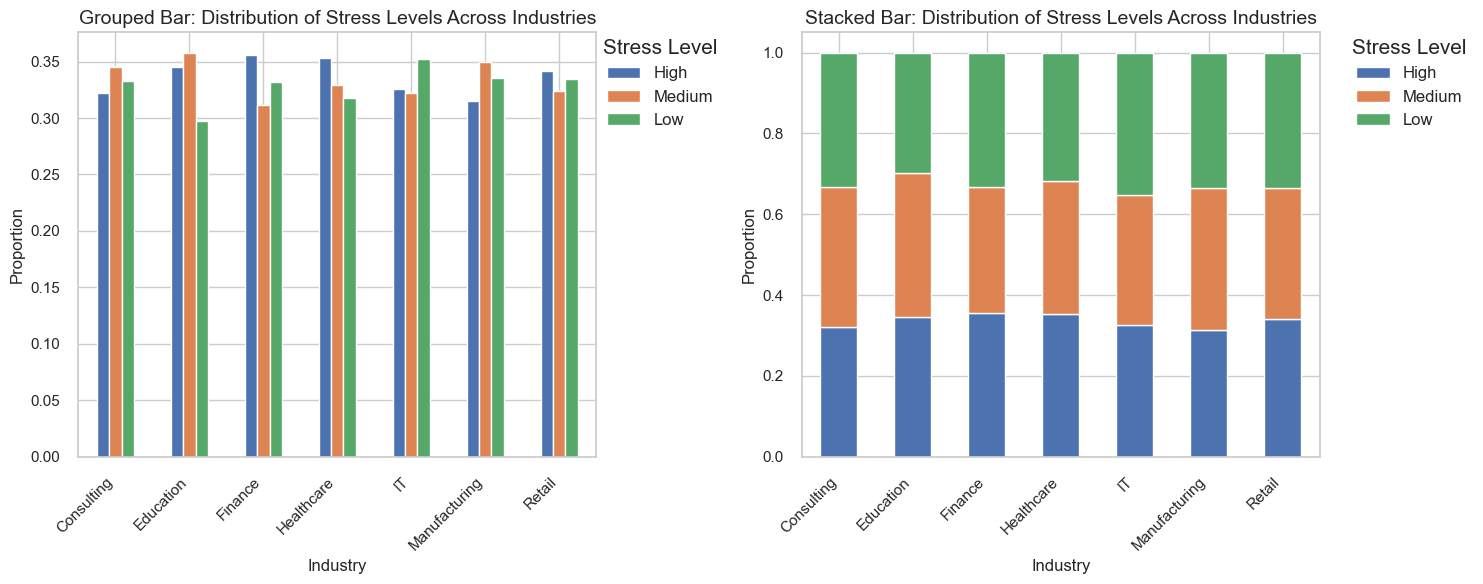

Stress Level Distribution by Industry:
Stress_Level   High  Medium   Low
Industry                         
Consulting     0.32    0.35  0.33
Education      0.34    0.36  0.30
Finance        0.36    0.31  0.33
Healthcare     0.35    0.33  0.32
IT             0.33    0.32  0.35
Manufacturing  0.31    0.35  0.34
Retail         0.34    0.32  0.33

Most Common Stress Level by Industry:
Industry
Consulting       Medium
Education        Medium
Finance            High
Healthcare         High
IT                  Low
Manufacturing    Medium
Retail             High
Name: Stress_Level, dtype: object


In [99]:
# Ensure 'Stress_Level' is categorized in the desired order
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=['High', 'Medium', 'Low'], ordered=True)

# Calculate the proportions of stress levels for each industry
stress_by_industry = df.groupby('Industry')['Stress_Level'].value_counts(normalize=True).unstack()

# Set up the plotting area with a more compact size for grouped and stacked plots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Create the Grouped Bar Chart (ax[0])
stress_by_industry[['High', 'Medium', 'Low']].plot(kind='bar', ax=ax[0])  # Explicitly order the bars
ax[0].set_title('Grouped Bar: Distribution of Stress Levels Across Industries', fontsize=14)
ax[0].set_xlabel('Industry', fontsize=12)
ax[0].set_ylabel('Proportion', fontsize=12)
ax[0].legend(title='Stress Level', title_fontsize='15', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Create the Stacked Bar Chart (ax[1])
stress_by_industry.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Stacked Bar: Distribution of Stress Levels Across Industries', fontsize=14)
ax[1].set_xlabel('Industry', fontsize=12)
ax[1].set_ylabel('Proportion', fontsize=12)
ax[1].legend(title='Stress Level', title_fontsize='15', fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and display both charts
plt.tight_layout()
plt.show()

# Print summary statistics
print("Stress Level Distribution by Industry:")
print(stress_by_industry[['High', 'Medium', 'Low']].round(2))  # Ordered summary

# Calculate and print the most common stress level for each industry
print("\nMost Common Stress Level by Industry:")
print(df.groupby('Industry')['Stress_Level'].agg(lambda x: x.value_counts().index[0]))


## What We Learned About Stress Levels in Different Industries

### Overall Picture
- Stress levels are pretty similar across all industries.
- Most industries have between 30% to 36% of workers in each stress level (High, Medium, Low).
- No industry stands out as having much higher or lower stress than the others.

### Industry Highlights
- Finance and Healthcare: Have the most workers with high stress (36% and 35%).
- IT: Has the most workers with low stress (35%).
- Education: Has the most workers with medium stress (36%).

### Most Common Stress Levels
- High Stress is most common in: Finance, Healthcare, and Retail
- Medium Stress is most common in: Consulting, Education, and Manufacturing
- Low Stress is most common in: IT (the only industry where this is true)

### Interesting Findings
- Manufacturing: Has the most even split between all stress levels.
- Finance: Shows the biggest difference between high stress (36%) and medium stress (31%).
- IT: Stands out as the only industry where low stress is most common.

### What This Means
- Finance, healthcare, and retail might need the most help with reducing stress.
- IT seems to have the least stressful work environment compared to other industries.
- Since stress levels are fairly even across industries, personal factors or specific job roles might matter more than the industry itself in determining stress levels.